<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/ESAA_YB_WEEK3_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[ 개념정리 ]**

np.unique()
- 배열이나 시리즈(Series)에서 중복을 제거한 고유값(Unique values)들을 반환하는 함수

DataFrame.pivot(index=.., columns=.., values=..)
- 만약 같은 (index, columns) 조합에서 **중복된 값**이 있다면, pivot()은 에러 발생

  -> **pivot_table()** 사용

      DataFrame.pivot_table(index=.., columns=.., values=..,)
  aggfunc='sum': 중복된 값이 있으면 합

  aggfunc='mean': 평균값으로 변환 가능

plt.xticks(rotation=..)
- X축의 label 길이가 너무 길 때에 **'vertical'** 적용 시 시각적으로 편리해짐

enumerate()
- 리스트, 튜플 등 반복 가능한(iterable) 객체를 순회할 때, **index와 value**를 동시에 가져올 수 있는 내장 함수

##### **※ 주의**

sns.plot()

- x와 y 함수 인자를 설정해야함

      sns.barplot(A,B,...) ( X )

      sns.barplot(x=A,y=B,...) ( O )

DataFrame.pivot()
- index, columns, values 함수 인자를 설정해야함

      DataFrame.pivot(index=.., columns=.., values=..)


### **[ 필사 ]**

In [39]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment=None
# default='warn'

In [40]:
from subprocess import check_output
print(check_output(["ls", "../content/drive/MyDrive/ESAA YB/dataset"]).decode("utf8"))

aisles.csv
departments.csv
movies_test.csv
movies_train.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv
submission.csv
titanic_train.csv



In [41]:
order_products_train_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/order_products__train.csv")
order_products_prior_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/order_products__prior.csv")
orders_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/orders.csv")
products_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/products.csv")
aisles_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/aisles.csv")
departments_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/departments.csv")

In [42]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [43]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [44]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


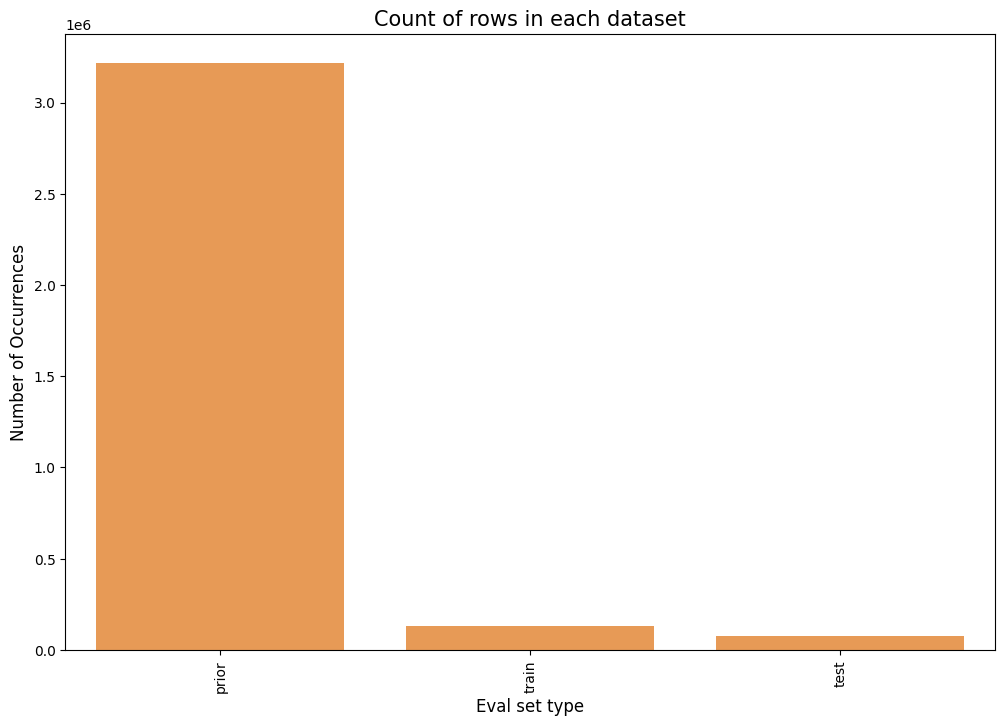

In [45]:
cnt_srs=orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Eval set type',fontsize=12)
plt.title('Count of rows in each dataset',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
def get_unique_count(x):
  return len(np.unique(x))

cnt_srs=orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,206209
test,75000
train,131209


<ipython-input-47-7bc0d53b359a>:1: FutureWarning: The provided callable <function max at 0x7f65187b89a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs=orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()


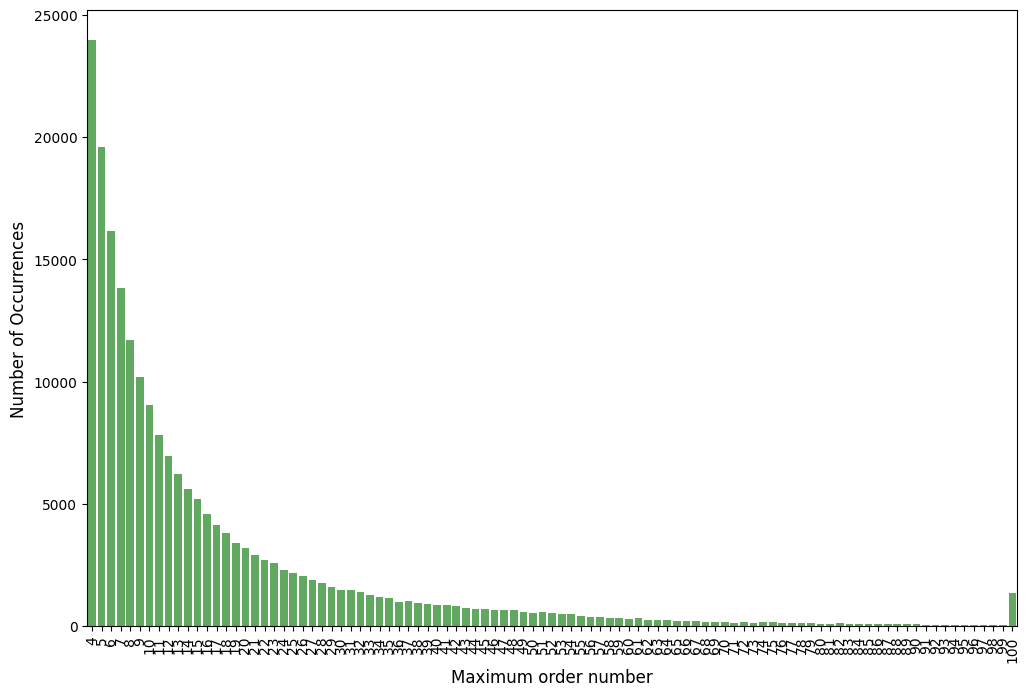

In [47]:
cnt_srs=orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs=cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Maximum order number',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

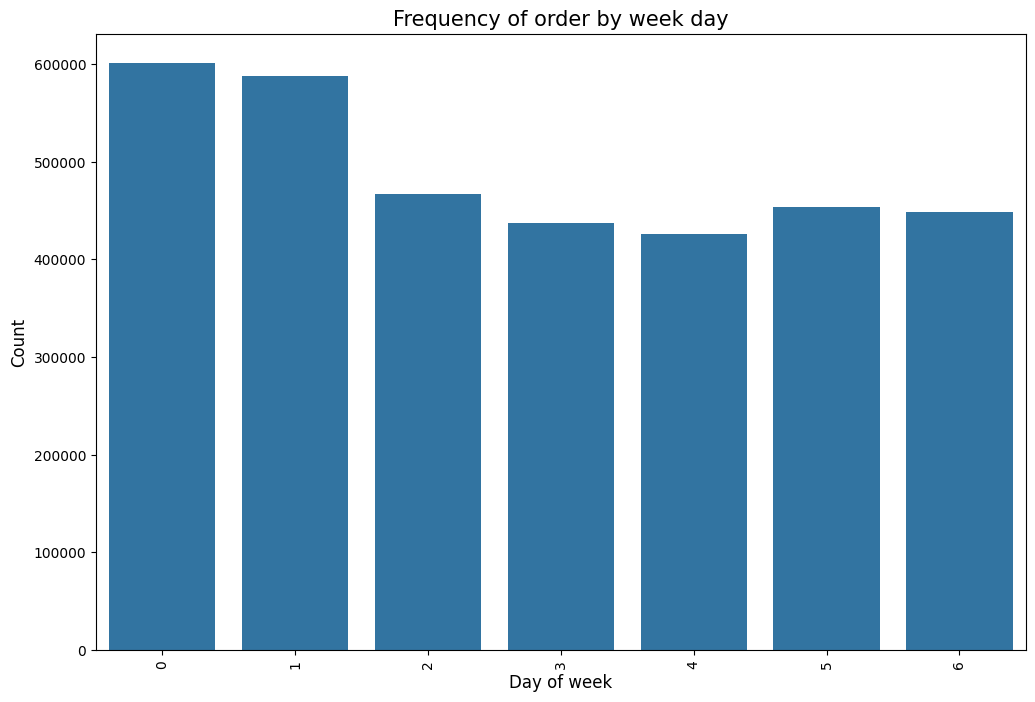

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow",data=orders_df,color=color[0])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Day of week',fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of order by week day',fontsize=15)
plt.show()

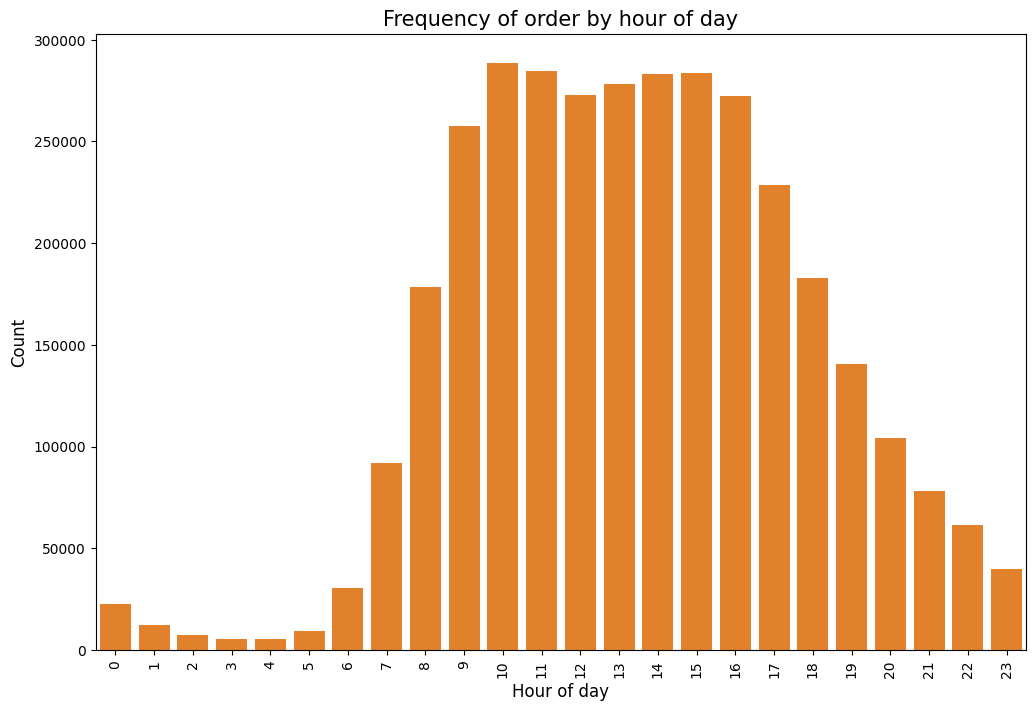

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day",data=orders_df,color=color[1])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Hour of day',fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day",fontsize=15)
plt.show()

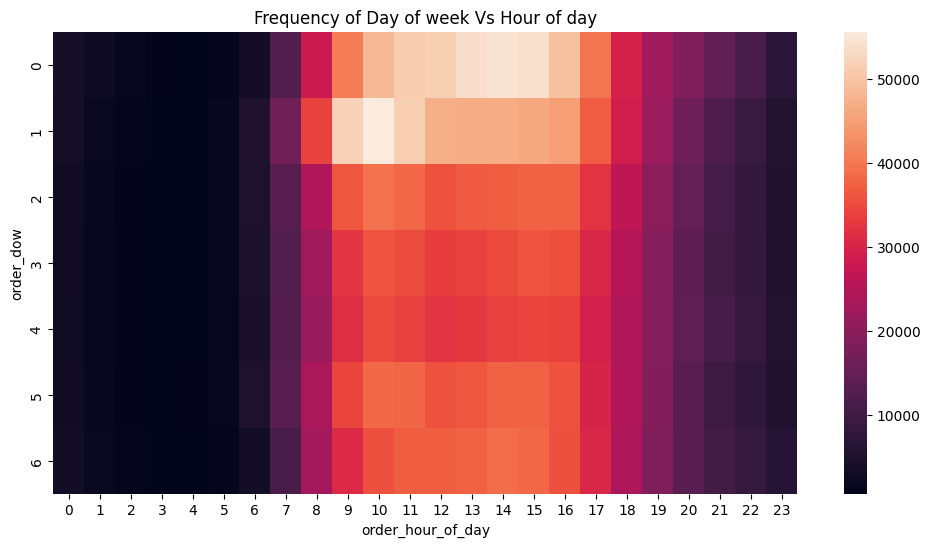

In [50]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

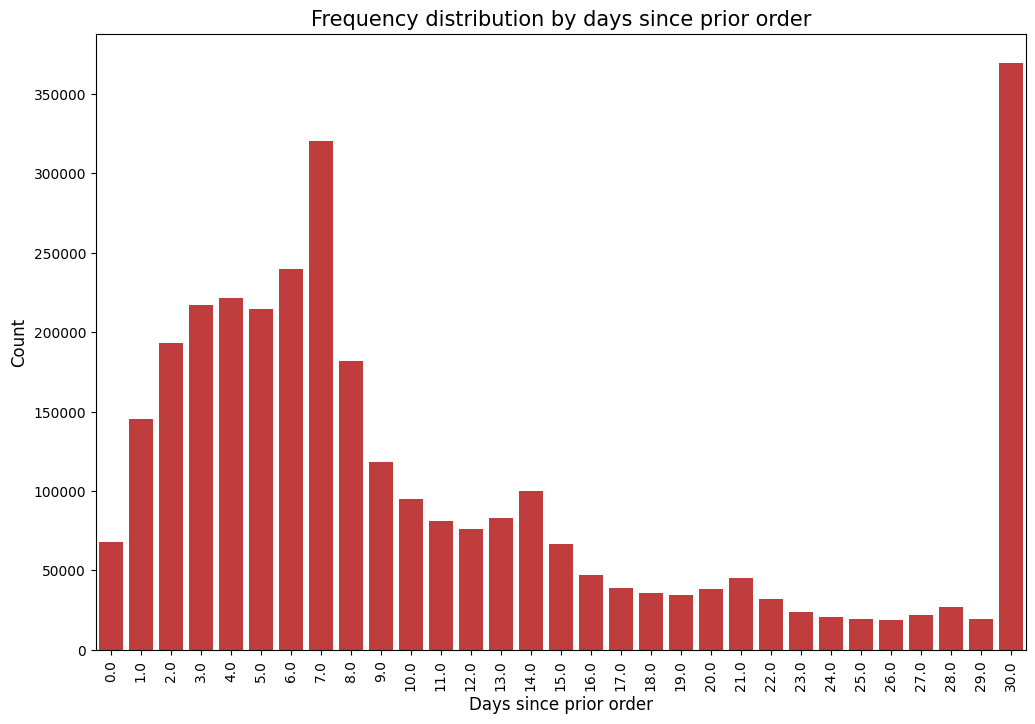

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order",data=orders_df,color=color[3])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Days since prior order',fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order",fontsize=15)
plt.show()

In [52]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

np.float64(0.5896974667922161)

In [53]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

np.float64(0.5985944127509629)

In [54]:
grouped_df=order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

<ipython-input-54-573d12ed732d>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1


,count
reordered,
1,0.879151
0,0.120849


In [55]:
grouped_df=order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

<ipython-input-55-4a0562f8d74e>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1


,count
reordered,
1,0.93444
0,0.06556


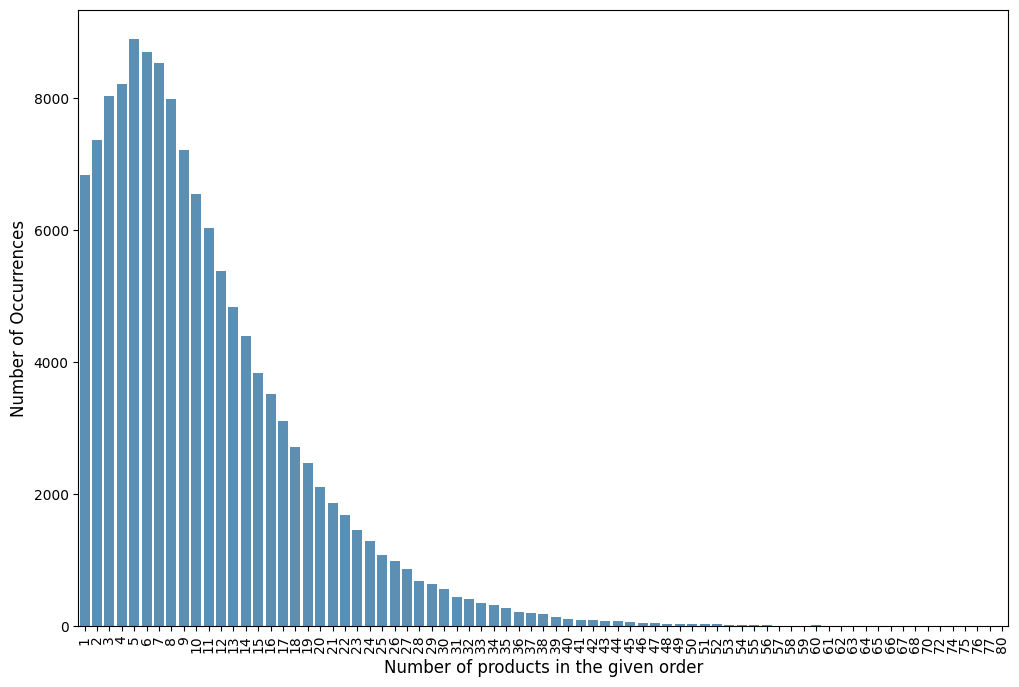

In [56]:
grouped_df=order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs=grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Number of products in the given order',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [58]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [59]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
order_products_prior_df=pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df=pd.merge(order_products_prior_df,aisles_df,on='aisle_id',how='left')
order_products_prior_df=pd.merge(order_products_prior_df,departments_df,on='department_id',how='left')
order_products_prior_df.head()

In [ ]:
cnt_srs=order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns=['product_name','frequency_count']
cnt_srs

In [ ]:
cnt_srs=order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index,y=cnt_srs.values,alpha=0.8,color=color[5])
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Aisle',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
temp_series=order_products_prior_df['department'].value_counts()
labels=(np.array(temp_series.index))
sizes=(np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes,labels=labels,
        autopct='%1.1f%%',startangle=200)
plt.title("Department distribution",fontsize=15)
plt.show()

In [ ]:
grouped_df=order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values,y=grouped_df['reordered'].values,alpha=0.8,color=color[2])
plt.ylabel('Reorder rate',fontsize=12)
plt.xlabel('Department',fontsize=12)
plt.title("Department wise reorder ratio",fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
grouped_df=order_products_prior_df.groupby(["department_id","aisle"])["reordered"].aggregate("mean").reset_index()

fig,ax=plt.subplots(figsize=(12,20))
ax.scatter(x=grouped_df.reordered.values,y=grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
  ax.annotate(txt,(grouped_df.reordered.values[i],grouped_df.department_id.values[i]),
              rotation=45,ha='center',va='center',color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title('Reorder ratio of different aisles',fontsize=15)
plt.show()

In [ ]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70]=70
grouped_df=order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['add_to_cart_order_mod'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio',fontsize=12)
plt.xlabel('Add to cart order',fontsize=12)
plt.title("Add to cart order - Reorder ratio",fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
order_products_train_df=pd.merge(order_products_train_df,orders_df,on='order_id',how='left')
grouped_df=order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_dow'].values,y=grouped_df['reordered'].values,alpha=0.8,color=color[3])
plt.ylabel('Reorder ratio',fontsize=12)
plt.xlabel('Day of week',fontsize=12)
plt.title('Reorder ratio across day of week',fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.7)
plt.show()

In [ ]:
grouped_df=order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_hour_of_day'].values,y=grouped_df['reordered'].values,alpha=0.8,color=color[4])
plt.ylabel('Reorde ratio',fontsize=12)
plt.xlabel('Hour of day',fontsize=12)
plt.title("Reorder ratio across hour of day",fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.7)
plt.show()

In [ ]:
grouped_df=order_products_train_df.groupby(["order_dow","order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df=grouped_df.pivot(index='order_dow',columns='order_hour_of_day',values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

### **[ 추가 전처리 및 시각화 ]**

#### **주말과 평일의 상위 10개의 판매량이 높은 제품 비교**

##### **< 필요한 모듈 임포트 >**

In [1]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment=None
# default='warn'

In [3]:
from subprocess import check_output
print(check_output(["ls", "../content/drive/MyDrive/ESAA YB/dataset"]).decode("utf8"))

aisles.csv
departments.csv
movies_test.csv
movies_train.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv
submission.csv
titanic_train.csv



In [2]:
order_products_train_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/order_products__train.csv")
order_products_prior_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/order_products__prior.csv")
orders_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/orders.csv")
products_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/products.csv")
aisles_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/aisles.csv")
departments_df=pd.read_csv("../content/drive/MyDrive/ESAA YB/dataset/departments.csv")

##### **< 추가적인 데이터 전처리 >**

앞서 weekday를 다룬 그래프를 통해 order_dow가 0,1인 값이 Saturday, Sunday라고 예측한 결과를 이용

In [15]:
# 주말 데이터 (order_dow == 0 또는 order_dow == 1)
weekend_orders_df = orders_df.loc[orders_df['order_dow'].isin([0, 1])]
weekend_orders_df = pd.merge(weekend_orders_df, order_products_prior_df, on='order_id', how='left')

# 평일 데이터 (order_dow == 2~6)
weekday_orders_df = orders_df.loc[orders_df['order_dow'].isin([2, 3, 4, 5, 6])]
weekday_orders_df = pd.merge(weekday_orders_df, order_products_prior_df, on='order_id', how='left')
# 결과 확인
print("주말 데이터 크기:", weekend_orders_df.shape)
print("평일 데이터 크기:", weekday_orders_df.shape)

주말 데이터 크기: (11949428, 10)
평일 데이터 크기: (20691270, 10)


In [16]:
weekend_orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,550135,1,prior,7,1,9,20.0,196.0,1.0,1.0
1,550135,1,prior,7,1,9,20.0,10258.0,2.0,1.0
2,550135,1,prior,7,1,9,20.0,12427.0,3.0,1.0
3,550135,1,prior,7,1,9,20.0,25133.0,4.0,1.0
4,550135,1,prior,7,1,9,20.0,13032.0,5.0,1.0


In [10]:
weekday_orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


##### **< 주말과 평일의 판매제품, 판매량 비교>**

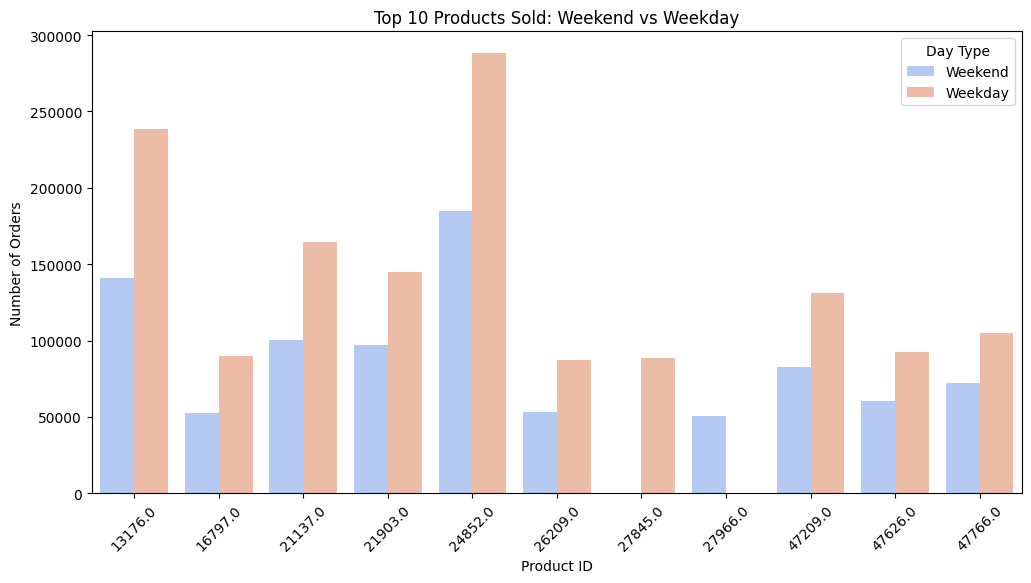

In [18]:
# 주말 & 평일 인기 상품 TOP 10
top_weekend_products = weekend_orders_df['product_id'].value_counts().head(10)
top_weekday_products = weekday_orders_df['product_id'].value_counts().head(10)

# 데이터 정리
top_weekend_df = pd.DataFrame({'Product ID': top_weekend_products.index, 'Orders': top_weekend_products.values, 'Type': 'Weekend'})
top_weekday_df = pd.DataFrame({'Product ID': top_weekday_products.index, 'Orders': top_weekday_products.values, 'Type': 'Weekday'})

# 하나의 데이터프레임으로 합치기
top_products_df = pd.concat([top_weekend_df, top_weekday_df])

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='Product ID', y='Orders', hue='Type', data=top_products_df, palette='coolwarm')
plt.title('Top 10 Products Sold: Weekend vs Weekday')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.show()

주말에 비해 평일의 판매량이 상대적으로 높은 것을 확인할 수 있음
   
   -> 이는 주말은 2일이고 평일은 5일이기 때문에 판매량 자체는 평일이 많다고 예측할 수 있음

주말과 평일에 많이 판매되는 제품의 종류가 대체로 비슷하다고 볼 수 있음

특히 상품번호 13176, 24852에서 주말과 평일 모두 다른 제품에 비해 상대적으로 높은 피크를 보임

상품번호 27845는 평일에만 잘 팔리는 상품으로 예상됨. 주말 판매량 상위 10개의 제품에 셀렉되지 못하여 주말 판매량은 나타나지않음

반대로 상품번호 27966은 주말에만 잘 팔리는 상품으로 예상할 수 있음. 이 상품은 평일 판매량 상위 10개의 제품에 셀렉되지 못하여 평일 판매량이 나타나지 않음

---

추가적으로, 상품번호를 통해 어떤 종류의 제품이 잘 팔리는 지에 대해 알아보기 위해 추가 전처리를 진행

In [35]:
products_with_departments_df = pd.merge(products_df, departments_df, on="department_id", how="left")

In [31]:
# product_id = 13176
product_13176_df = products_with_departments_df[products_with_departments_df['product_id'] == 13176].reset_index(drop=True)
product_13176_df[['product_id','product_name']]

,product_id,product_name
0,13176,Bag of Organic Bananas


In [32]:
# product_id = 24852
product_24852_df = products_with_departments_df[products_with_departments_df['product_id'] == 24852].reset_index(drop=True)
product_24852_df[['product_id','product_name']]

,product_id,product_name
0,24852,Banana


주말과 평일 모두 상대적으로 높은 피크를 보였던 제품은 **(유기농) 바나나**임

In [33]:
# product_id = 27845
product_27845_df = products_with_departments_df[products_with_departments_df['product_id'] == 27845].reset_index(drop=True)
product_27845_df[['product_id','product_name']]

,product_id,product_name
0,27845,Organic Whole Milk


주말에 비해 평일에 상대적으로 많이 팔리는 제품은 **유기농 전유**임

In [34]:
# product_id = 27966
product_27966_df = products_with_departments_df[products_with_departments_df['product_id'] == 27966].reset_index(drop=True)
product_27966_df[['product_id','product_name']]

,product_id,product_name
0,27966,Organic Raspberries


평일에 비해 주말에 상대적으로 많이 팔리는 제품은 **유기농 라즈베리**임